<a href="https://colab.research.google.com/github/Viraj1901181/CF969-Big-Data-for-Computational-Finance/blob/master/Lab_6_%26_7___CF969.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up
First, import necessary libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Get the data
The data covers the new millenium (2000 onwards) and is available in the data directory. Data comes from the S&P 500 (S&P), NYSE, Dow Jones Industrial Average (DJIA), Nikkei 225 (Nikkei), Hang Seng, FTSE 100 (FTSE), DAX, and All Ordinaries (AORD) indices. We access this data as Pandas DataFrames.

In [0]:
#Reading the datasets in different dataframes using Pandas

snp = pd.read_csv("/content/YAHOO-INDEX_GSPC.csv", index_col='Date')
nyse = pd.read_csv("/content/YAHOO-INDEX_NYA.csv", index_col='Date') 
djia = pd.read_csv("/content/YAHOO-INDEX_DJI.csv", index_col='Date') 
nikkei = pd.read_csv("/content/YAHOO-INDEX_N225.csv", index_col='Date') 
hangseng = pd.read_csv("/content/YAHOO-INDEX_HSI.csv", index_col='Date') 
ftse = pd.read_csv("/content/FTSE100.csv", index_col='Date') 
dax = pd.read_csv("/content/YAHOO-INDEX_GDAXI.csv", index_col='Date') 
aord = pd.read_csv("/content/YAHOO-INDEX_AORD.csv", index_col='Date')


# Munge the data
In the first instance, munging the data is straightforward. The closing prices are of interest, so for convenience extract the closing prices for each of the indices into a single Pandas DataFrame, called closing_data. Because not all of the indices have the same number of values, mainly due to bank holidays, we'll forward-fill the gaps. This means that, if a value isn't available for day  N , fill it with the value for another day, such as  N−1  or  N−2 , so that it contains the latest available value.

In [0]:
closing_data = pd.DataFrame()

closing_data['snp_close'] = snp['Close']
closing_data['nyse_close'] = nyse['Close']
closing_data['djia_close'] = djia['Close']
closing_data['nikkei_close'] = nikkei['Close']
closing_data['hangseng_close'] = hangseng['Close']
closing_data['ftse_close'] = ftse['Close']
closing_data['dax_close'] = dax['Close']
closing_data['aord_close'] = aord['Close']

# Pandas includes a very convenient function for filling gaps in the data.
#closing_data = closing_data.fillna(method='ffill')
closing_data = closing_data.fillna(method='bfill')


At this point, you've sourced some years of time series for eight financial indices, combined the pertinent data into a single data structure, and harmonized the data to have the same number of entries, by using only the 20 lines of code in this notebook. Plus, it took about 10 seconds to do all of that. That's impressive!

# Exploratory data analysis
Exploratory Data Analysis (EDA) is foundational to working with machine learning, and any other sort of analysis. EDA means getting to know your data, getting your fingers dirty with your data, feeling it and seeing it. The end result is you know your data very well, so when you build models you build them based on an actual, practical, physical understanding of the data, not assumptions or vaguely held notions. You can still make assumptions of course, but EDA means you will understand your assumptions and why you're making those assumptions. First, take a look at the data.


In [5]:
closing_data.describe()

,snp_close,nyse_close,djia_close,nikkei_close,hangseng_close,ftse_close,dax_close,aord_close
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1574.680111,8597.753004,14037.820207,14242.218633,19664.394100,5883.696708,7441.133374,4715.645048
std,585.531515,2303.961842,5194.703363,4412.459201,5724.158643,1016.265763,2880.716086,1097.941992
min,676.530029,4226.310059,6547.049805,7054.979980,8409.009766,3287.000000,2202.959961,2673.300049
25%,1151.534942,6762.189941,10415.632570,10304.580080,14749.575195,5206.950000,5265.657348,3599.424926
50%,1360.954956,8191.020019,12105.665040,13847.419920,20674.665040,5954.250000,6834.709961,4832.350098
75%,1986.222473,10438.937743,17006.514648,17406.151860,23499.082032,6633.500000,9753.149658,5566.724976
max,3240.020020,13944.139650,28645.259770,24270.619140,33154.121090,7877.500000,13559.599610,6967.000000


You can see that the various indices operate on scales differing by orders of magnitude. It's best to scale the data so that, for example, operations involving multiple indices aren't unduly influenced by a single, massive index.

Plot the data.

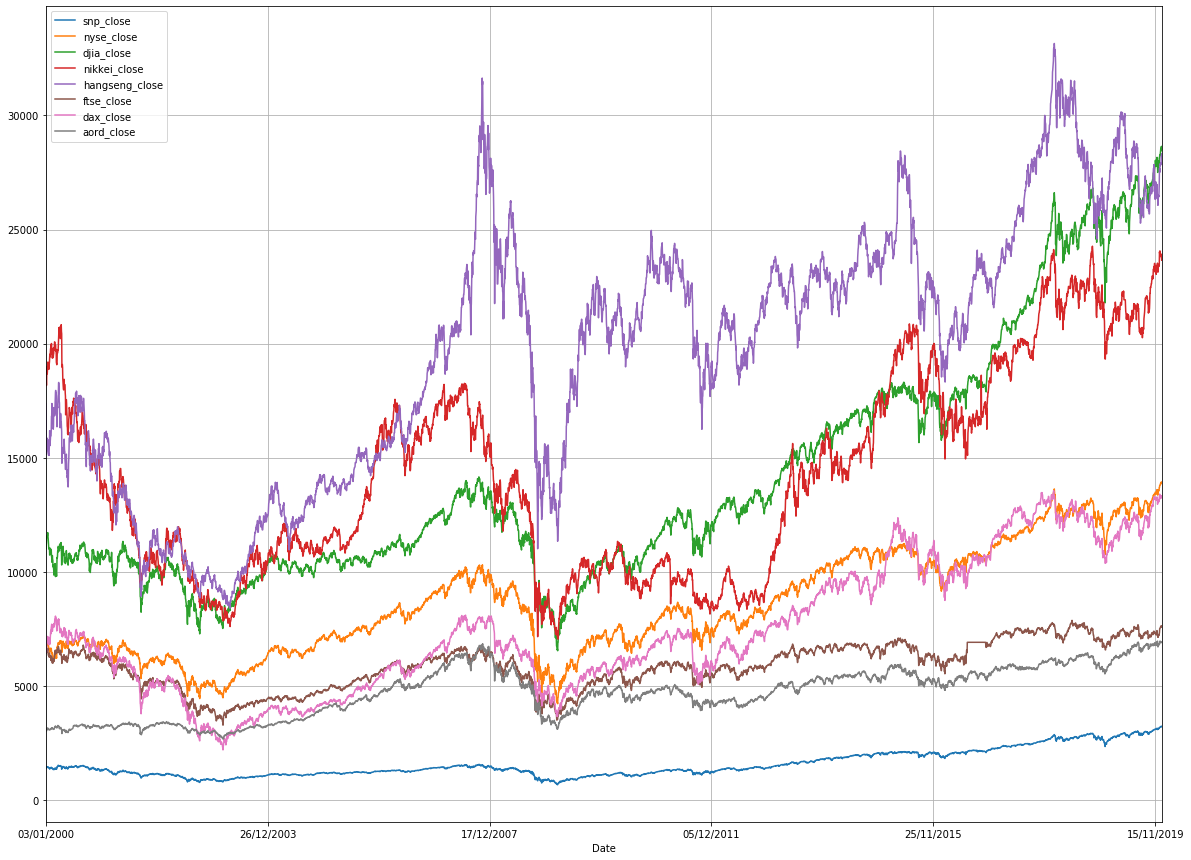

In [6]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.

plot_frame = pd.DataFrame()

plot_frame = pd.concat([closing_data['snp_close'],
  closing_data['nyse_close'],
  closing_data['djia_close'],
  closing_data['nikkei_close'],
  closing_data['hangseng_close'],
  closing_data['ftse_close'],
  closing_data['dax_close'],
  closing_data['aord_close']], axis=1)
plot_frame.plot(figsize=(20, 15), grid=True)


As expected, the structure isn't uniformly visible for the indices. Divide each value in an individual index by the maximum value for that index, and then replot. The maximum value of all indices will be 1.

In [0]:
closing_data['snp_close_scaled'] = closing_data['snp_close'] / max(closing_data['snp_close'])
closing_data['nyse_close_scaled'] = closing_data['nyse_close'] / max(closing_data['nyse_close'])
closing_data['djia_close_scaled'] = closing_data['djia_close'] / max(closing_data['djia_close'])
closing_data['nikkei_close_scaled'] = closing_data['nikkei_close'] / max(closing_data['nikkei_close'])
closing_data['hangseng_close_scaled'] = closing_data['hangseng_close'] / max(closing_data['hangseng_close'])
closing_data['ftse_close_scaled'] = closing_data['ftse_close'] / max(closing_data['ftse_close'])
closing_data['dax_close_scaled'] = closing_data['dax_close'] / max(closing_data['dax_close'])
closing_data['aord_close_scaled'] = closing_data['aord_close'] / max(closing_data['aord_close'])

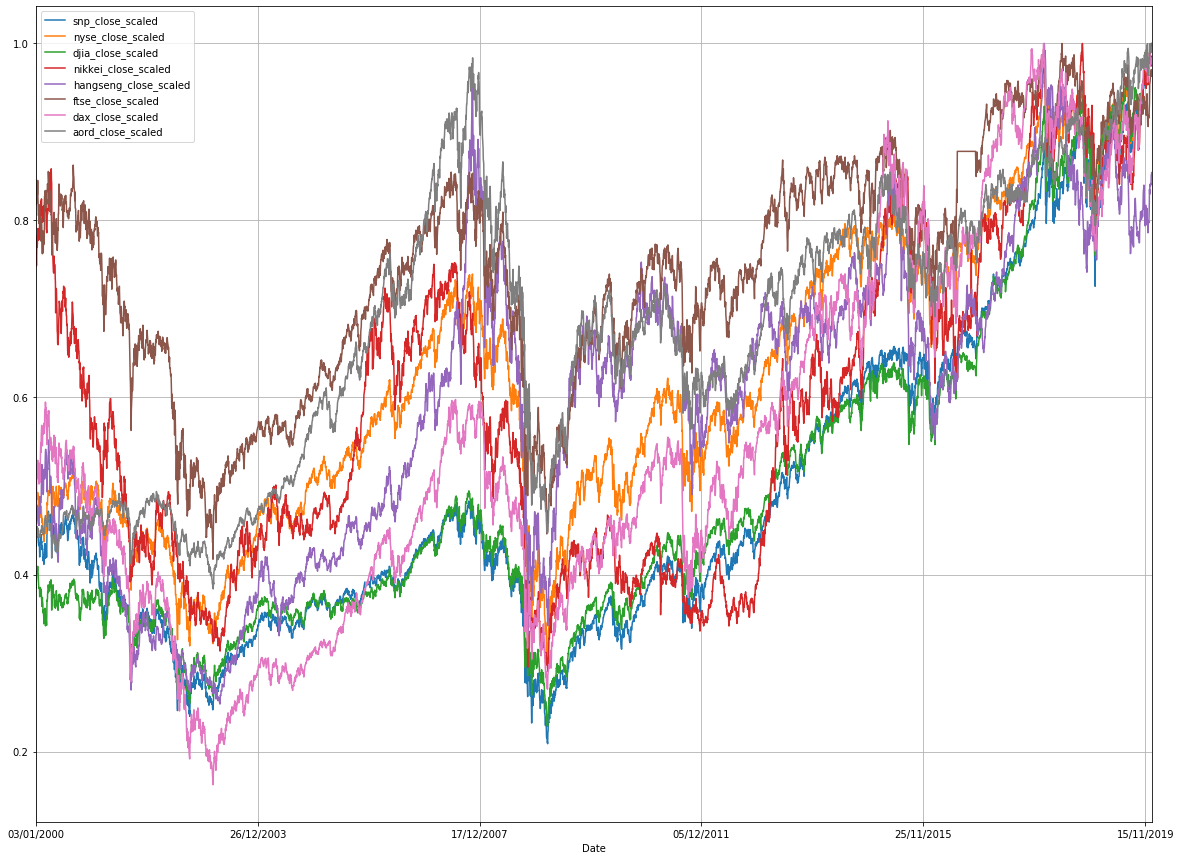

In [8]:
_ = pd.concat([closing_data['snp_close_scaled'],
  closing_data['nyse_close_scaled'],
  closing_data['djia_close_scaled'],
  closing_data['nikkei_close_scaled'],
  closing_data['hangseng_close_scaled'],
  closing_data['ftse_close_scaled'],
  closing_data['dax_close_scaled'],
  closing_data['aord_close_scaled']], axis=1).plot(figsize=(20, 15), grid=True)

You can see that, over the period of interest, these indices are correlated. Notice that sudden drops from economic events happened globally to all indices, and they otherwise exhibited general rises. This is a good start, though not the complete story. Next, plot autocorrelations for each of the indices. The autocorrelations determine correlations between current values of the index and lagged values of the same index. The goal is to determine whether the lagged values are reliable indicators of the current values. If they are, then we've identified a correlation.



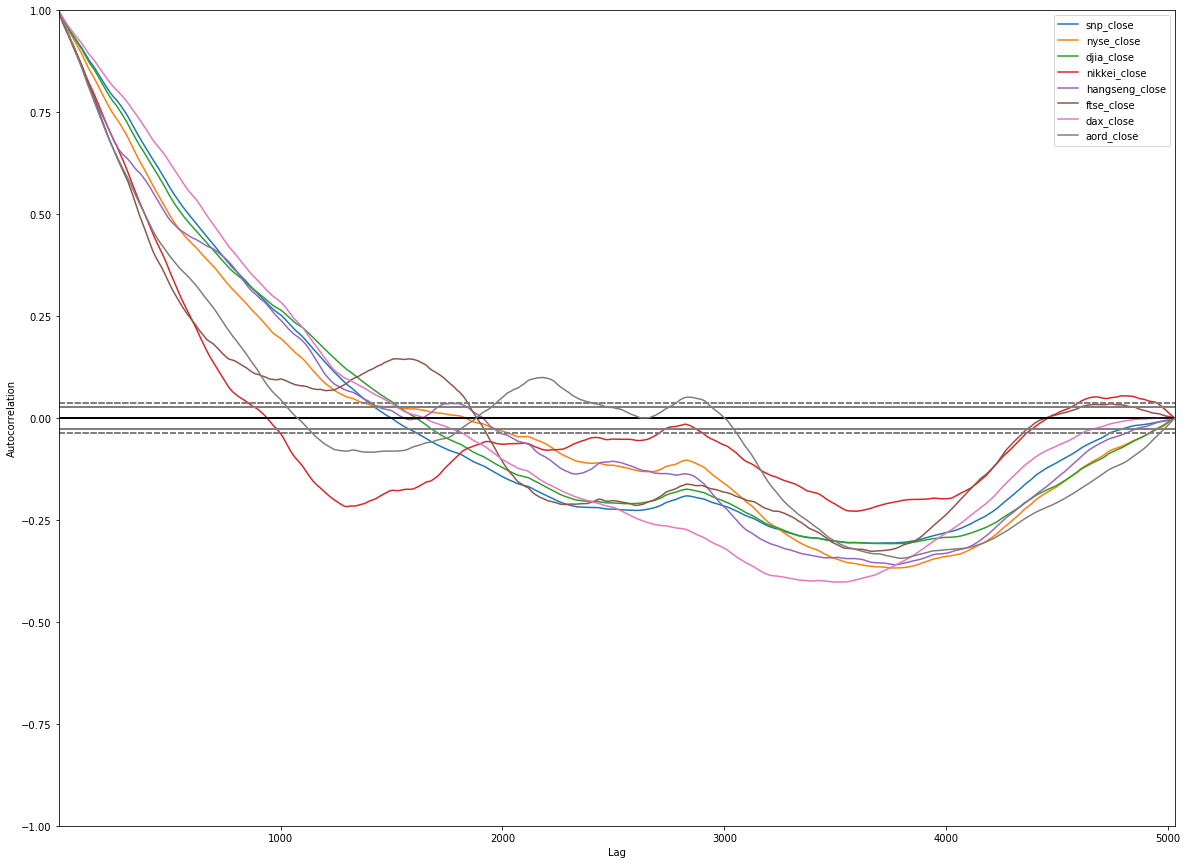

In [9]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(closing_data['snp_close'], label='snp_close')
_ = autocorrelation_plot(closing_data['nyse_close'], label='nyse_close')
_ = autocorrelation_plot(closing_data['djia_close'], label='djia_close')
_ = autocorrelation_plot(closing_data['nikkei_close'], label='nikkei_close')
_ = autocorrelation_plot(closing_data['hangseng_close'], label='hangseng_close')
_ = autocorrelation_plot(closing_data['ftse_close'], label='ftse_close')
_ = autocorrelation_plot(closing_data['dax_close'], label='dax_close')
_ = autocorrelation_plot(closing_data['aord_close'], label='aord_close')

_ = plt.legend(loc='upper right')

You should see strong autocorrelations, positive for around 500 lagged days, then going negative. This tells us something we should intuitively know: if an index is rising it tends to carry on rising, and vice-versa. It should be encouraging that what we see here conforms to what we know about financial markets.

Next, look at a scatter matrix, showing everything plotted against everything, to see how indices are correlated with each other.

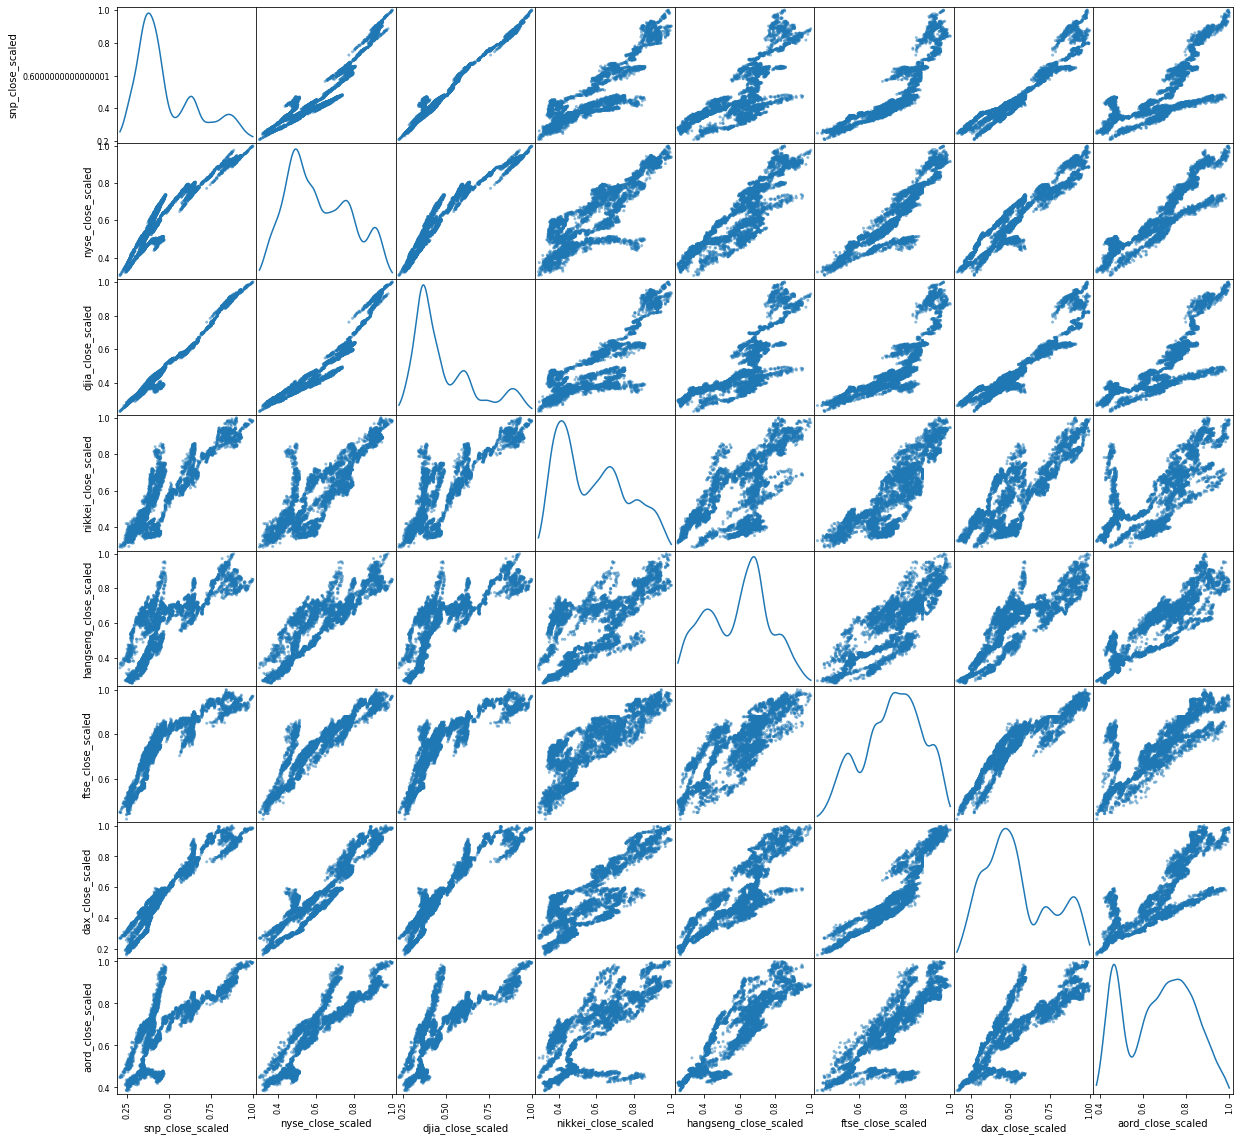

In [10]:
plot_frame=pd.concat([closing_data['snp_close_scaled'],
  closing_data['nyse_close_scaled'],
  closing_data['djia_close_scaled'],
  closing_data['nikkei_close_scaled'],
  closing_data['hangseng_close_scaled'],
  closing_data['ftse_close_scaled'],
  closing_data['dax_close_scaled'],
  closing_data['aord_close_scaled']], axis=1)
_ = scatter_matrix(plot_frame, figsize=(20, 20), diagonal='kde')
#plot_frame.describe()

You can see significant correlations across the board, further evidence that the premise is workable and one market can be influenced by another. As an aside, this process of gradual, incremental experimentation and progress is the best approach and what you probably do normally. With a little patience, we'll get to some deeper understanding. The actual value of an index is not that useful for modeling. It can be a useful indicator, but to get to the heart of the matter, we need a time series that is stationary in the mean, thus having no trend in the data. There are various ways of doing that, but they all essentially look at the difference between values, rather than the absolute value. In the case of market data, the usual practice is to work with logged returns, calculated as the natural logarithm of the index today divided by the index yesterday:

ln(Vt/Vt−1)
 
There are more reasons why the log return is preferable to the percent return (for example the log is normally distributed and additive), but they don't matter much for this work. What matters is to get to a stationary time series. Calculate and plot the log returns in a new DataFrame.

In [11]:
log_return_data = pd.DataFrame()

log_return_data['snp_log_return'] = np.log(closing_data['snp_close']/closing_data['snp_close'].shift())
log_return_data['nyse_log_return'] = np.log(closing_data['nyse_close']/closing_data['nyse_close'].shift())
log_return_data['djia_log_return'] = np.log(closing_data['djia_close']/closing_data['djia_close'].shift())
log_return_data['nikkei_log_return'] = np.log(closing_data['nikkei_close']/closing_data['nikkei_close'].shift())
log_return_data['hangseng_log_return'] = np.log(closing_data['hangseng_close']/closing_data['hangseng_close'].shift())
log_return_data['ftse_log_return'] = np.log(closing_data['ftse_close']/closing_data['ftse_close'].shift())
log_return_data['dax_log_return'] = np.log(closing_data['dax_close']/closing_data['dax_close'].shift())
log_return_data['aord_log_return'] = np.log(closing_data['aord_close']/closing_data['aord_close'].shift())

log_return_data.describe()

,snp_log_return,nyse_log_return,djia_log_return,nikkei_log_return,hangseng_log_return,ftse_log_return,dax_log_return,aord_log_return
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,0.000158,0.000143,0.000183,0.000044,0.000097,0.000026,0.000134,0.000158
std,0.011899,0.011784,0.011224,0.014773,0.014501,0.011544,0.014636,0.009481
min,-0.094695,-0.102321,-0.082005,-0.121110,-0.146954,-0.092646,-0.095756,-0.104874
25%,-0.004712,-0.004613,-0.004523,-0.006610,-0.006239,-0.005129,-0.006599,-0.004245
50%,0.000545,0.000605,0.000485,0.000000,0.000000,0.000000,0.000598,0.000402
75%,0.005667,0.005553,0.005440,0.007528,0.007013,0.005646,0.007184,0.005114
max,0.109572,0.115258,0.105083,0.132346,0.134068,0.093842,0.107975,0.054010


Looking at the log returns, you should see that the mean, min, max are all similar. You could go further and center the series on zero, scale them, and normalize the standard deviation, but there's no need to do that at this point. Let's move forward with plotting the data, and iterate if necessary.

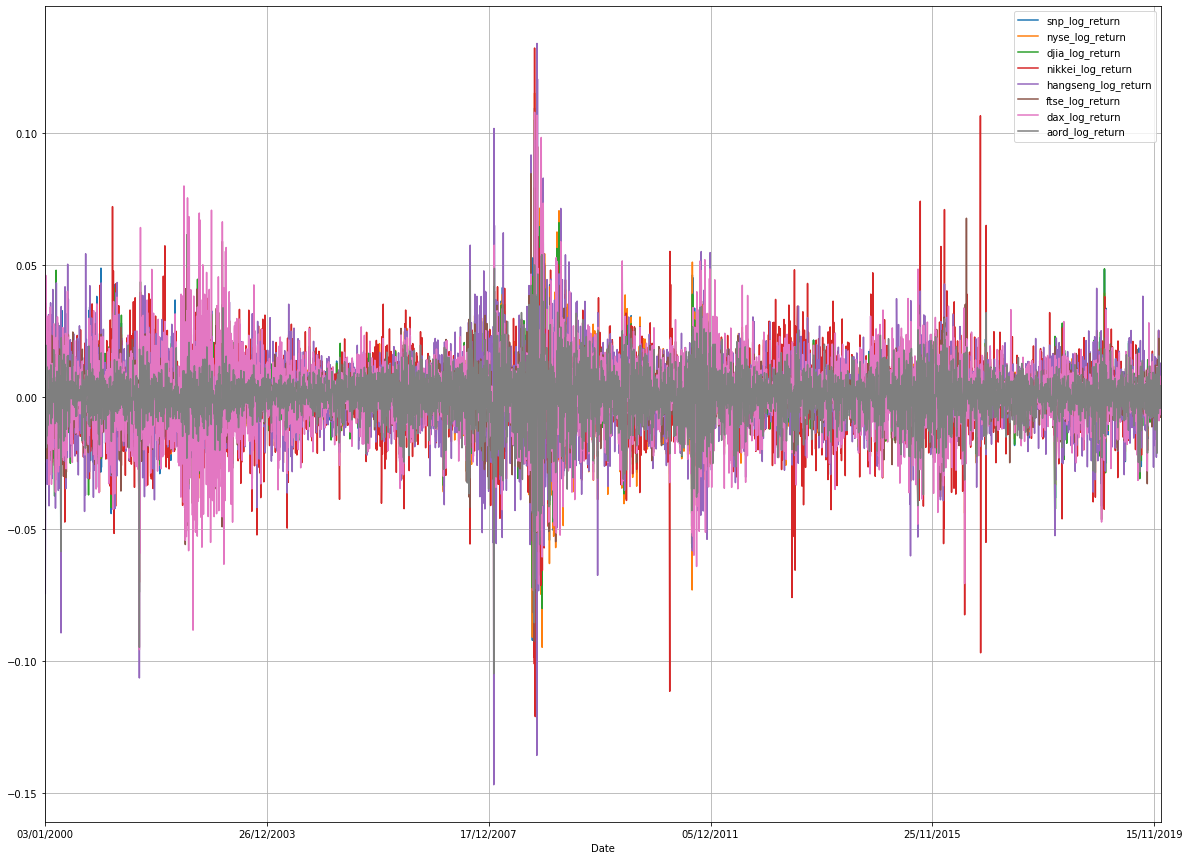

In [12]:
_ = pd.concat([
  log_return_data['snp_log_return'],
  log_return_data['nyse_log_return'],
  log_return_data['djia_log_return'],
  log_return_data['nikkei_log_return'],
  log_return_data['hangseng_log_return'],
  log_return_data['ftse_log_return'],
  log_return_data['dax_log_return'],
  log_return_data['aord_log_return']], axis=1).plot(figsize=(20, 15), grid=True)

You can see from the plot that the log returns of our indices are similarly scaled and centered, with no visible trend in the data. It's looking good, so now look at autocorrelations.

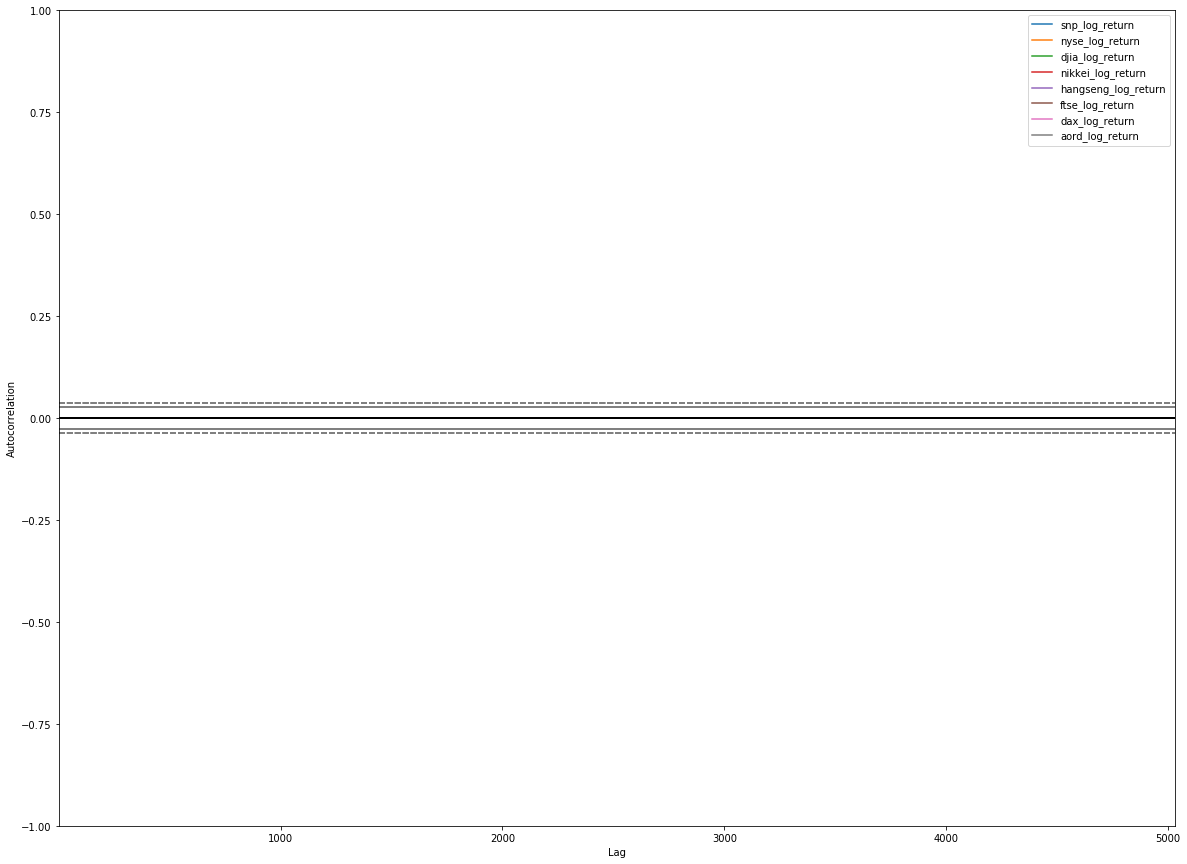

In [13]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(log_return_data['snp_log_return'], label='snp_log_return')
_ = autocorrelation_plot(log_return_data['nyse_log_return'], label='nyse_log_return')
_ = autocorrelation_plot(log_return_data['djia_log_return'], label='djia_log_return')
_ = autocorrelation_plot(log_return_data['nikkei_log_return'], label='nikkei_log_return')
_ = autocorrelation_plot(log_return_data['hangseng_log_return'], label='hangseng_log_return')
_ = autocorrelation_plot(log_return_data['ftse_log_return'], label='ftse_log_return')
_ = autocorrelation_plot(log_return_data['dax_log_return'], label='dax_log_return')
_ = autocorrelation_plot(log_return_data['aord_log_return'], label='aord_log_return')

_ = plt.legend(loc='upper right')

No autocorrelations are visible in the plot, which is what we're looking for. Individual financial markets are Markov processes, knowledge of history doesn't allow you to predict the future. You now have time series for the indices, stationary in the mean, similarly centered and scaled. That's great! Now start to look for signals to try to predict the close of the S&P 500. Look at a scatterplot to see how the log return indices correlate with each other.

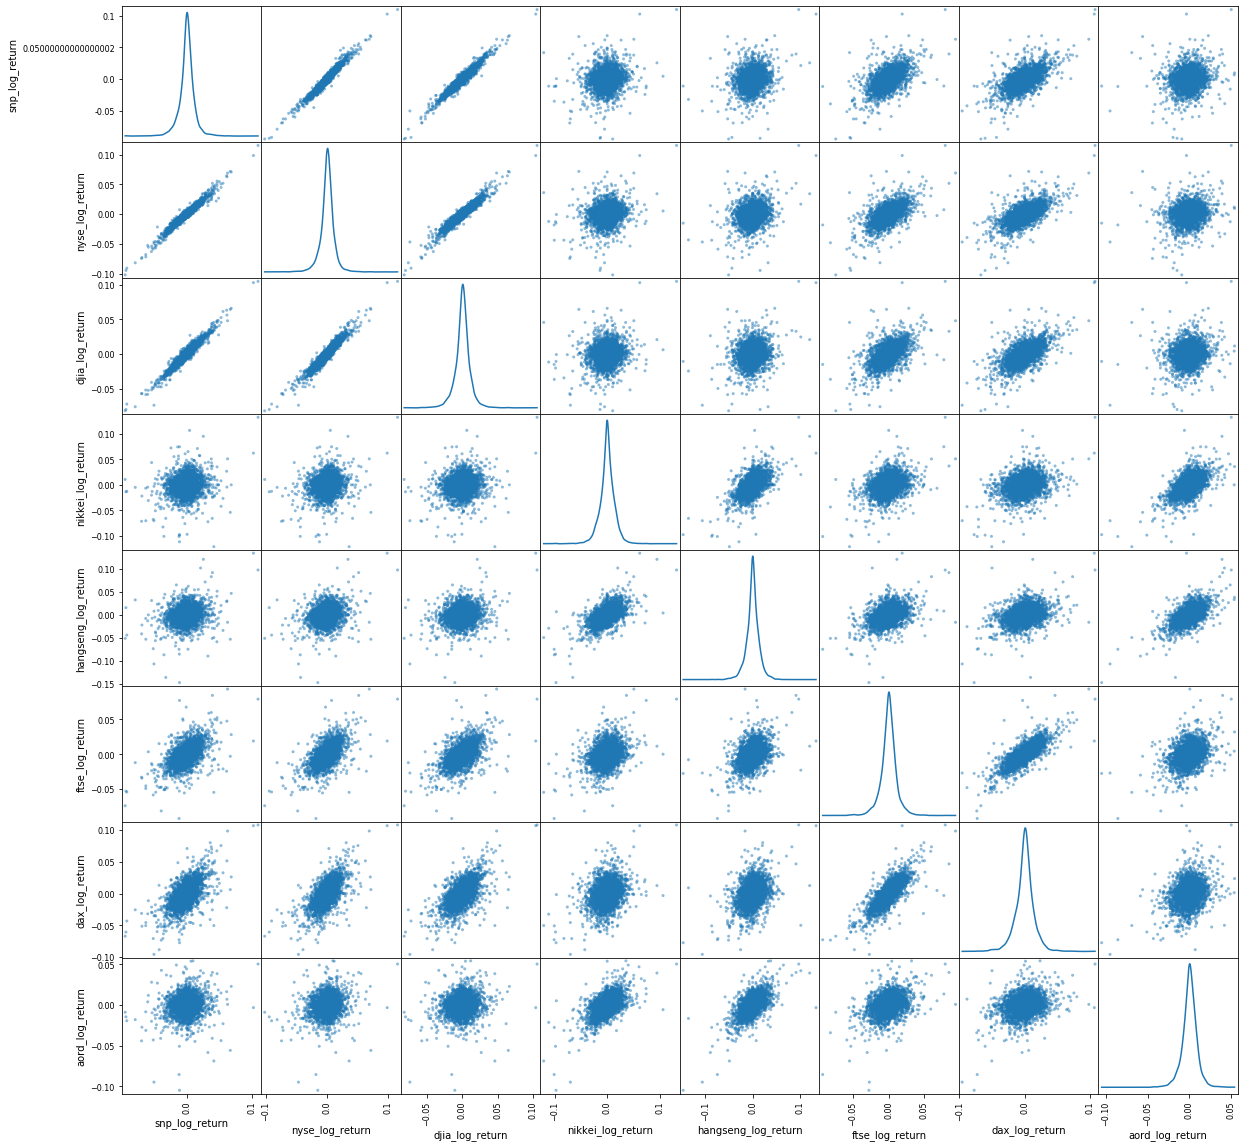

In [14]:
_ = scatter_matrix(log_return_data, figsize=(20, 20), diagonal='kde')

In [15]:
tmp = pd.DataFrame()
tmp['snp_0'] = log_return_data['snp_log_return']
tmp['nyse_1'] = log_return_data['nyse_log_return'].shift()
tmp['djia_1'] = log_return_data['djia_log_return'].shift()
tmp['ftse_0'] = log_return_data['ftse_log_return']
tmp['dax_0'] = log_return_data['dax_log_return']
tmp['hangseng_0'] = log_return_data['hangseng_log_return']
tmp['nikkei_0'] = log_return_data['nikkei_log_return']
tmp['aord_0'] = log_return_data['aord_log_return']
tmp.corr().iloc[:,0]

snp_0         1.000000
nyse_1       -0.074663
djia_1       -0.072265
ftse_0        0.541357
dax_0         0.606412
hangseng_0    0.214484
nikkei_0      0.164326
aord_0        0.137991
Name: snp_0, dtype: float64

Here, we are directly working with the premise. We're correlating the close of the S&P 500 with signals available before the close of the S&P 500. And you can see that the S&P 500 close is correlated with European indices at around 0.54 for FTSE, 0.61 for DAX, which is a strong correlation, and Asian/Oceanian indices at around 0.13-0.21, which is a significant correlation, but not with US indices. We have available signals from other indices and regions for our model.

Now look at how the log returns for the S&P closing values correlate with index values from the previous day to see if the previous closing is predictive. Following from the premise that financial markets are Markov processes, there should be little or no value in historical values.

In [16]:
tmp = pd.DataFrame()
tmp['snp_0'] = log_return_data['snp_log_return']
tmp['nyse_1'] = log_return_data['nyse_log_return'].shift(2)
tmp['djia_1'] = log_return_data['djia_log_return'].shift(2)
tmp['ftse_0'] = log_return_data['ftse_log_return'].shift()
tmp['dax_0'] = log_return_data['dax_log_return'].shift()
tmp['hangseng_0'] = log_return_data['hangseng_log_return'].shift()
tmp['nikkei_0'] = log_return_data['nikkei_log_return'].shift()
tmp['aord_0'] = log_return_data['aord_log_return'].shift()
tmp.corr().iloc[:,0]

snp_0         1.000000
nyse_1       -0.049581
djia_1       -0.053414
ftse_0       -0.048142
dax_0        -0.032014
hangseng_0   -0.033372
nikkei_0     -0.014106
aord_0       -0.030590
Name: snp_0, dtype: float64

You should see little to no correlation in this data, meaning that yesterday's values are no practical help in predicting today's close. Let's go one step further and look at correlations between today and the the day before yesterday.

In [17]:
tmp = pd.DataFrame()
tmp['snp_0'] = log_return_data['snp_log_return']
tmp['nyse_1'] = log_return_data['nyse_log_return'].shift(3)
tmp['djia_1'] = log_return_data['djia_log_return'].shift(3)
tmp['ftse_0'] = log_return_data['ftse_log_return'].shift(2)
tmp['dax_0'] = log_return_data['dax_log_return'].shift(2)
tmp['hangseng_0'] = log_return_data['hangseng_log_return'].shift(2)
tmp['nikkei_0'] = log_return_data['nikkei_log_return'].shift(2)
tmp['aord_0'] = log_return_data['aord_log_return'].shift(2)

tmp.corr().iloc[:,0]

snp_0         1.000000
nyse_1        0.024108
djia_1        0.027298
ftse_0       -0.024815
dax_0        -0.017853
hangseng_0   -0.010385
nikkei_0     -0.028460
aord_0       -0.002370
Name: snp_0, dtype: float64

Again, there are little to no correlations.

# Summing up the EDA
At this point, you've done a good enough job of exploratory data analysis. You've visualized our data and come to know it better. You've transformed it into a form that is useful for modelling, log returns, and looked at how indices relate to each other. You've seen that indices from Europe strongly correlate with US indices, and that indices from Asia/Oceania significantly correlate with those same indices for a given day. You've also seen that if you look at historical values, they do not correlate with today's values. Summing up:
European indices from the same day were a strong predictor for the S&P 500 close.
Asian/Oceanian indices from the same day were a significant predictor for the S&P 500 close.
Indices from previous days were not good predictors for the S&P close.

# Feature selection
At this point, we can see a model:
We'll predict whether the S&P 500 close today will be higher or lower than yesterday.
We'll use all our data sources: NYSE, DJIA, Nikkei, Hang Seng, FTSE, DAX, AORD.
We'll use three sets of data points —  T ,  T−1 , and  T−2  — where we take the data available on day  T  or  T−n , meaning today's non-US data and yesterday's US data.
Predicting whether the log return of the S&P 500 is positive or negative is a classification problem. That is, we want to choose one option from a finite set of options, in this case positive or negative. This is the base case of classification where we have only two values to choose from, known as binary classification, or logistic regression. This uses the findings from of our exploratory data analysis, namely that log returns from other regions on a given day are strongly correlated with the log return of the S&P 500, and there are stronger correlations from those regions that are geographically closer with respect to time zones. However, our models also use data outside of those findings. For example, we use data from the past few days in addition to today. There are two reasons for using this additional data. First, we're adding additional features to our model for the purpose of this solution to see how things perform (which is of course not a good reason for adding features outside of a tutorial setting). Second, machine learning models are very good at finding weak signals from data. In machine learning, as in most things, there are subtle tradeoffs happening, but in general good data is better than good algorithms, which are better than good frameworks. You need all three pillars but in that order of importance: data, algorithms, frameworks.


# TensorFlow
TensorFlow is an open source software library, initiated by Google, for numerical computation using data flow graphs. TensorFlow is based on Google's machine learning expertise and is the next generation framework used internally at Google for tasks such as translation and image recognition. It's a wonderful framework for machine learning because it's expressive, efficient, and easy to use.

Feature engineering for TensorFlow
From a training and testing perspective, time series data is easy. Training data should come from events that happened before test data events, and be contiguous in time. Otherwise, your model would be trained on events from "the future", at least as compared to the test data. It would then likely perform badly in practice, because you can’t really have access to data from the future. That means random sampling or cross validation don't apply to time series data. Decide on a training-versus-testing split, and divide your data into training and test datasets. In this case, you'll create the features together with two additional columns:
snp_log_return_positive, which is 1 if the log return of the S&P 500 close is positive, and 0 otherwise.
snp_log_return_negative, which is 1 if the log return of the S&P 500 close is negative, and 0 otherwise.
Now, logically you could encode this information in one column, named snp_log_return, which is 1 if positive and 0 if negative, but that's not the way TensorFlow works for classification models. TensorFlow uses the general definition of classification, that there can be many different potential values to choose from, and a form or encoding for these options called one-hot encoding. One-hot encoding means that each choice is an entry in an array, and the actual value has an entry of 1 with all other values being 0. This encoding (i.e. a single 1 in an array of 0s) is for the input of the model, where you categorically know which value is correct. A variation of this is used for the output, where each entry in the array contains the probability of the answer being that choice. You can then choose the most likely value by choosing the highest probability, together with having a measure of the confidence you can place in that answer relative to other answers.

We'll use 80% of our data for training and 20% for testing.

In [18]:
log_return_data['snp_log_return_positive'] = 0
log_return_data.loc[log_return_data['snp_log_return'] >= 0, 'snp_log_return_positive'] = 1
log_return_data['snp_log_return_negative'] = 0
log_return_data.loc[log_return_data['snp_log_return'] < 0, 'snp_log_return_negative'] = 1

training_test_data = pd.DataFrame(
  columns=[
    'snp_log_return_positive', 'snp_log_return_negative',
    'snp_log_return_1', 'snp_log_return_2', 'snp_log_return_3',
    'nyse_log_return_1', 'nyse_log_return_2', 'nyse_log_return_3',
    'djia_log_return_1', 'djia_log_return_2', 'djia_log_return_3',
    'nikkei_log_return_0', 'nikkei_log_return_1', 'nikkei_log_return_2',
    'hangseng_log_return_0', 'hangseng_log_return_1', 'hangseng_log_return_2',
    'ftse_log_return_0', 'ftse_log_return_1', 'ftse_log_return_2',
    'dax_log_return_0', 'dax_log_return_1', 'dax_log_return_2',
    'aord_log_return_0', 'aord_log_return_1', 'aord_log_return_2'])

for i in range(7, len(log_return_data)):
  snp_log_return_positive = log_return_data['snp_log_return_positive'].iloc[i]
  snp_log_return_negative = log_return_data['snp_log_return_negative'].iloc[i]
  snp_log_return_1 = log_return_data['snp_log_return'].iloc[i-1]
  snp_log_return_2 = log_return_data['snp_log_return'].iloc[i-2]
  snp_log_return_3 = log_return_data['snp_log_return'].iloc[i-3]
  nyse_log_return_1 = log_return_data['nyse_log_return'].iloc[i-1]
  nyse_log_return_2 = log_return_data['nyse_log_return'].iloc[i-2]
  nyse_log_return_3 = log_return_data['nyse_log_return'].iloc[i-3]
  djia_log_return_1 = log_return_data['djia_log_return'].iloc[i-1]
  djia_log_return_2 = log_return_data['djia_log_return'].iloc[i-2]
  djia_log_return_3 = log_return_data['djia_log_return'].iloc[i-3]
  nikkei_log_return_0 = log_return_data['nikkei_log_return'].iloc[i]
  nikkei_log_return_1 = log_return_data['nikkei_log_return'].iloc[i-1]
  nikkei_log_return_2 = log_return_data['nikkei_log_return'].iloc[i-2]
  hangseng_log_return_0 = log_return_data['hangseng_log_return'].iloc[i]
  hangseng_log_return_1 = log_return_data['hangseng_log_return'].iloc[i-1]
  hangseng_log_return_2 = log_return_data['hangseng_log_return'].iloc[i-2]
  ftse_log_return_0 = log_return_data['ftse_log_return'].iloc[i]
  ftse_log_return_1 = log_return_data['ftse_log_return'].iloc[i-1]
  ftse_log_return_2 = log_return_data['ftse_log_return'].iloc[i-2]
  dax_log_return_0 = log_return_data['dax_log_return'].iloc[i]
  dax_log_return_1 = log_return_data['dax_log_return'].iloc[i-1]
  dax_log_return_2 = log_return_data['dax_log_return'].iloc[i-2]
  aord_log_return_0 = log_return_data['aord_log_return'].iloc[i]
  aord_log_return_1 = log_return_data['aord_log_return'].iloc[i-1]
  aord_log_return_2 = log_return_data['aord_log_return'].iloc[i-2]
  training_test_data = training_test_data.append(
    {'snp_log_return_positive':snp_log_return_positive,
    'snp_log_return_negative':snp_log_return_negative,
    'snp_log_return_1':snp_log_return_1,
    'snp_log_return_2':snp_log_return_2,
    'snp_log_return_3':snp_log_return_3,
    'nyse_log_return_1':nyse_log_return_1,
    'nyse_log_return_2':nyse_log_return_2,
    'nyse_log_return_3':nyse_log_return_3,
    'djia_log_return_1':djia_log_return_1,
    'djia_log_return_2':djia_log_return_2,
    'djia_log_return_3':djia_log_return_3,
    'nikkei_log_return_0':nikkei_log_return_0,
    'nikkei_log_return_1':nikkei_log_return_1,
    'nikkei_log_return_2':nikkei_log_return_2,
    'hangseng_log_return_0':hangseng_log_return_0,
    'hangseng_log_return_1':hangseng_log_return_1,
    'hangseng_log_return_2':hangseng_log_return_2,
    'ftse_log_return_0':ftse_log_return_0,
    'ftse_log_return_1':ftse_log_return_1,
    'ftse_log_return_2':ftse_log_return_2,
    'dax_log_return_0':dax_log_return_0,
    'dax_log_return_1':dax_log_return_1,
    'dax_log_return_2':dax_log_return_2,
    'aord_log_return_0':aord_log_return_0,
    'aord_log_return_1':aord_log_return_1,
    'aord_log_return_2':aord_log_return_2},
    ignore_index=True)
  
training_test_data.describe()


,snp_log_return_positive,snp_log_return_negative,snp_log_return_1,snp_log_return_2,snp_log_return_3,nyse_log_return_1,nyse_log_return_2,nyse_log_return_3,djia_log_return_1,djia_log_return_2,djia_log_return_3,nikkei_log_return_0,nikkei_log_return_1,nikkei_log_return_2,hangseng_log_return_0,hangseng_log_return_1,hangseng_log_return_2,ftse_log_return_0,ftse_log_return_1,ftse_log_return_2,dax_log_return_0,dax_log_return_1,dax_log_return_2,aord_log_return_0,aord_log_return_1,aord_log_return_2
count,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000,5023.000000
mean,0.535736,0.464264,0.000159,0.000161,0.000166,0.000142,0.000143,0.000147,0.000180,0.000181,0.000185,0.000045,0.000047,0.000055,0.000115,0.000115,0.000121,0.000030,0.000029,0.000032,0.000130,0.000130,0.000135,0.000156,0.000160,0.000164
std,0.498771,0.498771,0.011886,0.011887,0.011893,0.011776,0.011776,0.011780,0.011213,0.011214,0.011218,0.014766,0.014766,0.014774,0.014448,0.014448,0.014453,0.011542,0.011543,0.011545,0.014622,0.014622,0.014625,0.009473,0.009476,0.009480
min,0.000000,0.000000,-0.094695,-0.094695,-0.094695,-0.102321,-0.102321,-0.102321,-0.082005,-0.082005,-0.082005,-0.121110,-0.121110,-0.121110,-0.146954,-0.146954,-0.146954,-0.092646,-0.092646,-0.092646,-0.095756,-0.095756,-0.095756,-0.104874,-0.104874,-0.104874
25%,0.000000,0.000000,-0.004710,-0.004710,-0.004710,-0.004613,-0.004613,-0.004613,-0.004521,-0.004521,-0.004521,-0.006608,-0.006605,-0.006605,-0.006231,-0.006231,-0.006231,-0.005124,-0.005124,-0.005124,-0.006594,-0.006574,-0.006574,-0.004241,-0.004241,-0.004241
50%,1.000000,0.000000,0.000545,0.000545,0.000545,0.000601,0.000605,0.000605,0.000484,0.000484,0.000484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000015,0.000017,0.000598,0.000598,0.000600,0.000402,0.000404,0.000405
75%,1.000000,1.000000,0.005656,0.005668,0.005670,0.005544,0.005550,0.005557,0.005430,0.005430,0.005438,0.007531,0.007531,0.007548,0.007012,0.007012,0.007015,0.005645,0.005645,0.005646,0.007179,0.007179,0.007192,0.005113,0.005115,0.005124
max,1.000000,1.000000,0.109572,0.109572,0.109572,0.115258,0.115258,0.115258,0.105083,0.105083,0.105083,0.132346,0.132346,0.132346,0.134068,0.134068,0.134068,0.093842,0.093842,0.093842,0.107975,0.107975,0.107975,0.054010,0.054010,0.054010


Now, create the training and test data.

In [19]:
predictors_tf = training_test_data[training_test_data.columns[2:]]

classes_tf = training_test_data[training_test_data.columns[:2]]

training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.describe()


,snp_log_return_1,snp_log_return_2,snp_log_return_3,nyse_log_return_1,nyse_log_return_2,nyse_log_return_3,djia_log_return_1,djia_log_return_2,djia_log_return_3,nikkei_log_return_0,nikkei_log_return_1,nikkei_log_return_2,hangseng_log_return_0,hangseng_log_return_1,hangseng_log_return_2,ftse_log_return_0,ftse_log_return_1,ftse_log_return_2,dax_log_return_0,dax_log_return_1,dax_log_return_2,aord_log_return_0,aord_log_return_1,aord_log_return_2
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,0.000086,0.000091,0.000095,0.000100,0.000104,0.000107,0.000104,0.000107,0.000110,-0.000005,0.000002,0.000011,0.000080,0.000080,0.000089,-0.000011,-0.000013,-0.000007,0.000100,0.000109,0.000117,0.000130,0.000136,0.000139
std,0.012652,0.012653,0.012659,0.012600,0.012600,0.012604,0.011843,0.011843,0.011847,0.015256,0.015248,0.015258,0.015283,0.015283,0.015289,0.012237,0.012239,0.012241,0.015586,0.015571,0.015574,0.009982,0.009986,0.009990
min,-0.094695,-0.094695,-0.094695,-0.102321,-0.102321,-0.102321,-0.082005,-0.082005,-0.082005,-0.121110,-0.121110,-0.121110,-0.146954,-0.146954,-0.146954,-0.092646,-0.092646,-0.092646,-0.095756,-0.095756,-0.095756,-0.104874,-0.104874,-0.104874
25%,-0.005491,-0.005489,-0.005489,-0.005266,-0.005251,-0.005251,-0.005149,-0.005146,-0.005146,-0.007335,-0.007327,-0.007327,-0.006563,-0.006563,-0.006563,-0.005565,-0.005570,-0.005565,-0.007390,-0.007376,-0.007374,-0.004473,-0.004473,-0.004473
50%,0.000532,0.000536,0.000536,0.000598,0.000602,0.000602,0.000427,0.000433,0.000433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000097,0.000097,0.000106,0.000604,0.000604,0.000610,0.000333,0.000340,0.000340
75%,0.005980,0.005986,0.005986,0.005931,0.005942,0.005942,0.005707,0.005707,0.005707,0.008160,0.008160,0.008180,0.007280,0.007280,0.007287,0.006062,0.006062,0.006063,0.007771,0.007771,0.007778,0.005390,0.005397,0.005397
max,0.109572,0.109572,0.109572,0.115258,0.115258,0.115258,0.105083,0.105083,0.105083,0.132346,0.132346,0.132346,0.134068,0.134068,0.134068,0.093842,0.093842,0.093842,0.107975,0.107975,0.107975,0.054010,0.054010,0.054010


In [20]:
test_predictors_tf.describe()

,snp_log_return_1,snp_log_return_2,snp_log_return_3,nyse_log_return_1,nyse_log_return_2,nyse_log_return_3,djia_log_return_1,djia_log_return_2,djia_log_return_3,nikkei_log_return_0,nikkei_log_return_1,nikkei_log_return_2,hangseng_log_return_0,hangseng_log_return_1,hangseng_log_return_2,ftse_log_return_0,ftse_log_return_1,ftse_log_return_2,dax_log_return_0,dax_log_return_1,dax_log_return_2,aord_log_return_0,aord_log_return_1,aord_log_return_2
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.000449,0.000442,0.000447,0.000309,0.000301,0.000306,0.000484,0.000477,0.000484,0.000247,0.000224,0.000230,0.000255,0.000253,0.000248,0.000194,0.000197,0.000190,0.000252,0.000215,0.000204,0.000257,0.000255,0.000265
std,0.008131,0.008135,0.008140,0.007639,0.007644,0.007648,0.008226,0.008229,0.008235,0.012626,0.012662,0.012661,0.010466,0.010465,0.010467,0.008194,0.008192,0.008195,0.009873,0.009967,0.009973,0.007082,0.007083,0.007089
min,-0.041843,-0.041843,-0.041843,-0.043961,-0.043961,-0.043961,-0.047143,-0.047143,-0.047143,-0.096935,-0.096935,-0.096935,-0.052520,-0.052520,-0.052520,-0.046443,-0.046443,-0.046443,-0.070673,-0.070673,-0.070673,-0.032876,-0.032876,-0.032876
25%,-0.002390,-0.002417,-0.002417,-0.002772,-0.002772,-0.002772,-0.002665,-0.002744,-0.002744,-0.004539,-0.004539,-0.004539,-0.004813,-0.004813,-0.004844,-0.003593,-0.003593,-0.003597,-0.004403,-0.004403,-0.004404,-0.003354,-0.003450,-0.003450
50%,0.000582,0.000582,0.000582,0.000609,0.000609,0.000609,0.000749,0.000746,0.000746,0.000000,0.000000,0.000000,0.000497,0.000497,0.000497,0.000000,0.000000,0.000000,0.000587,0.000587,0.000587,0.000660,0.000660,0.000665
75%,0.004508,0.004508,0.004508,0.004299,0.004299,0.004305,0.004413,0.004413,0.004435,0.005580,0.005580,0.005580,0.005910,0.005910,0.005910,0.004071,0.004071,0.004071,0.005528,0.005528,0.005528,0.004570,0.004570,0.004605
max,0.048403,0.048403,0.048403,0.039530,0.039530,0.039530,0.048643,0.048643,0.048643,0.106654,0.106654,0.106654,0.042873,0.042873,0.042873,0.067810,0.067810,0.067810,0.034457,0.034457,0.034457,0.032049,0.032049,0.032049


Define some metrics here to evaluate the models.

Precision - The ability of the classifier not to label as positive a sample that is negative.
Recall - The ability of the classifier to find all the positive samples.
F1 Score - A weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
Accuracy - The percentage correctly predicted in the test data.

In [0]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
  predictions = tf.argmax(model, 1)
  actuals = tf.argmax(actual_classes, 1)

  ones_like_actuals = tf.ones_like(actuals)
  zeros_like_actuals = tf.zeros_like(actuals)
  ones_like_predictions = tf.ones_like(predictions)
  zeros_like_predictions = tf.zeros_like(predictions)

  tp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  tn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  fp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  fn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  tp, tn, fp, fn = \
    session.run(
      [tp_op, tn_op, fp_op, fn_op], 
      feed_dict
    )

  tpr = float(tp)/(float(tp) + float(fn))
  fpr = float(fp)/(float(tp) + float(fn))

  accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

  recall = tpr
  precision = float(tp)/(float(tp) + float(fp))
  
  f1_score = (2 * (precision * recall)) / (precision + recall)
  
  print('Precision = ', precision)
  print('Recall = ', recall)
  print('F1 Score = ', f1_score)
  print('Accuracy = ', accuracy)

# Binary classification with TensorFlow
Now, get some tensors flowing. The model is binary classification expressed in TensorFlow.

In [0]:
sess = tf.Session()

# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case

# Define placeholders for the data we feed into the process - feature data and actual classes.
feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, num_classes])

# Define a matrix of weights and initialize it with some small random values.
weights = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
biases = tf.Variable(tf.ones([num_classes]))

# Define our model...
# Here we take a softmax regression of the product of our feature data and weights.
model = tf.nn.softmax(tf.matmul(feature_data, weights) + biases)

# Define a cost function (we're using the cross entropy).
cost = -tf.reduce_sum(actual_classes*tf.log(model))

# Define a training step...
# Here we use gradient descent with a learning rate of 0.01 using the cost function we just defined.
training_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.global_variables_initializer()
sess.run(init)


We'll train our model in the following snippet. The approach of TensorFlow to executing graph operations allows fine-grained control over the process. Any operation you provide to the session as part of the run operation will be executed and the results returned. You can provide a list of multiple operations.

You'll train the model over 30,000 iterations using the full dataset each time. Every thousandth iteration we'll assess the accuracy of the model on the training data to assess progress.

In [24]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess.run(
    training_step, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print(i, sess.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))

5000 0.5433051
10000 0.5791439
15000 0.61697364
20000 0.63514185
25000 0.65007466
30000 0.66301644


In [25]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess, feed_dict)

Precision =  0.6866359447004609
Recall =  0.33184855233853006
F1 Score =  0.44744744744744747
Accuracy =  0.6338308457711442


The metrics for this most simple of TensorFlow models are unimpressive, an F1 Score of 0.44 is not going to blow any light bulbs in the room. That's partly because of its simplicity and partly because It hasn't been tuned; selection of hyperparameters is very important in machine learning modelling.

The metrics for this most simple of TensorFlow models are unimpressive, an F1 Score of 0.44 is not going to blow any light bulbs in the room. That's partly because of its simplicity and partly because It hasn't been tuned; selection of hyperparameters is very important in machine learning modelling.

# Feed-forward neural network with two hidden layers
You'll now build a proper feed-forward neural net with two hidden layers.

In [0]:
sess1 = tf.Session()

num_predictors = len(training_predictors_tf.columns)
num_classes = len(training_classes_tf.columns)

feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, 2])

weights1 = tf.Variable(tf.truncated_normal([24, 50], stddev=0.0001))
biases1 = tf.Variable(tf.ones([50]))

weights2 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.0001))
biases2 = tf.Variable(tf.ones([25]))
                     
weights3 = tf.Variable(tf.truncated_normal([25, 2], stddev=0.0001))
biases3 = tf.Variable(tf.ones([2]))

hidden_layer_1 = tf.nn.relu(tf.matmul(feature_data, weights1) + biases1)
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)
model = tf.nn.softmax(tf.matmul(hidden_layer_2, weights3) + biases3)

cost = -tf.reduce_sum(actual_classes*tf.log(model))

train_op1 = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.global_variables_initializer()
sess1.run(init)

Again, you'll train the model over 30,000 iterations using the full dataset each time. Every thousandth iteration, you'll assess the accuracy of the model on the training data to assess progress.

In [27]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess1.run(
    train_op1, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print (i, sess1.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))


5000 0.72224987
10000 0.7227476
15000 0.72150326
20000 0.72299653
25000 0.72224987
30000 0.72473866


In [28]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess1, feed_dict)


Precision =  0.6873385012919897
Recall =  0.5924276169265034
F1 Score =  0.6363636363636364
Accuracy =  0.6975124378109453


# Conclusion
You've covered a lot of ground. You moved from sourcing several years of financial time-series data, to munging that data into a more suitable form. You explored and visualized that data with exploratory data analysis and then decided on a machine learning model and the features for that model. You engineered those features, built a binary classifier in TensorFlow, and analyzed its performance. You built a feed forward neural net with two hidden layers in TensorFlow and analyzed its performance. How did the technology fare? It should take most people 1.5 to 3 hours to extract the juice from this solution, and none of that time is spent waiting for infrastructure or software; it's spent reading and thinking. In many organizations, it can take anywhere from days to months to do this sort of data analysis, depending on whether you need to procure any hardware. It was also cost effective. If you took your time with this solution and spent three hours to go through it, the cost would be a few pennies. TensorFlow is a special piece of technology. It is expressive, performs well, and comes with the weight of Google's machine learning history and expertise to back it up and support it. We've only scratched the surface, but you can already see that within a handful of lines of code we've been able to write two models. Neither of them is cutting edge, by design, but neither of them is trivial either. With some additional tuning they would suit a whole spectrum of machine learning tasks. Finally, how did we do with the data analysis? We did well: over 70% accuracy in predicting the close of the S&P 500 is the highest we've seen achieved on this dataset, so with few steps and a few lines of code we've produced a full-on machine learning model. The reason for the relatively modest accuracy achieved is the dataset itself; there isn't enough signal there to do significantly better. But 7 times out of 10, we were able to correctly determine if the S&P 500 index would close up or down on the day, and that's objectively good.



# Follow-up work
What would change if you used 5 years of data?
Can you add instructions to get a computational graph?
Can you try a similar approach with different data (e.g., currencies)?